# Lab Final Round

### Import libraries and data

In [2489]:
import pandas as pd
import statistics as stats
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder  
from sklearn.model_selection import train_test_split

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [2490]:
data.head()
#The data presents important information for a car insurance company. A further analysis can help predict claim amounts 
#and frequency in order to make response more efficient, increase customer satisfaction, retain business. Therefore, 
#Total_Claim_Amount will represent our label, which is the data we want to predict in this case. 

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Cleaning/Wrangling/EDA

In [2491]:
#Change headers names.
data.columns = list(map(lambda x: x.replace(" ","_"), data.columns))
data.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [2492]:
#Deal with NaN values.
data.isna().sum() #Data has no NaN values.

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [2493]:
#Categorical Features.
data_cat = data.select_dtypes(include = object)
data_cat = data_cat.drop(['Customer'], axis=1) #We can drop the column 'Customer', as it adds no significant information regarding other variables.
data['Effective_To_Date'] = pd.to_datetime(data['Effective_To_Date'], errors='coerce') #Since there are dates in the column, it is not really a categorical value.
data_cat

,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [2494]:
#Numerical Features.
data_num = data.select_dtypes(include = np.number)
data_num

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [2495]:
#Exploration.

In [2496]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Lifetime_Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly_Premium_Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months_Since_Last_Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months_Since_Policy_Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number_of_Open_Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number_of_Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total_Claim_Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [2497]:
#The mean shows greater values than the median ('50%') for most of the variables, suggesting the existence of outliers.
#This is confirmed if we check, for instance, how much the max differs from the 75% in columns such as "Total_Claim_Amount" and "Customer_Lifetime_Value"; and how much the min differs from the 25% column for "Income".

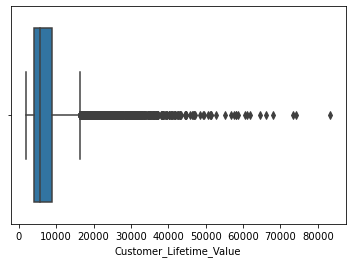

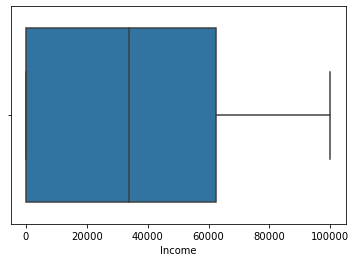

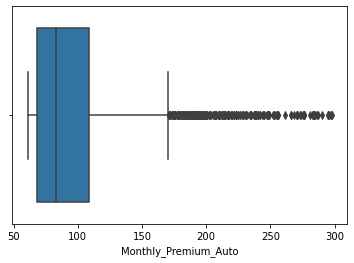

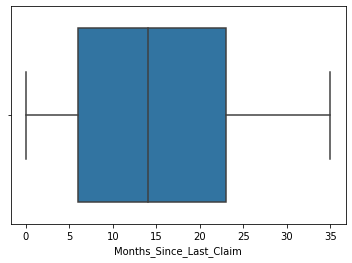

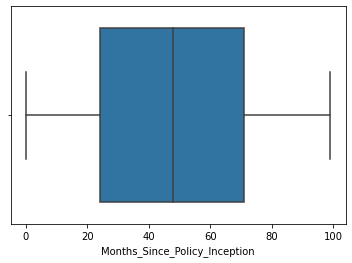

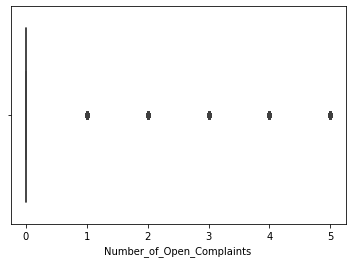

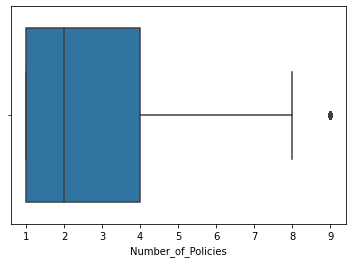

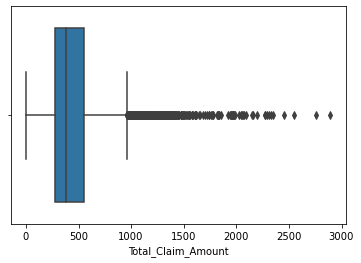

In [2498]:
#Check outliers visually:
for column in data_num:
    sns.boxplot(x=data_num[column])
    plt.show()

### Processing Data

#Dealing with outliers.
iqr = np.percentile(data_num["Total_Claim_Amount"],75) - np.percentile(data_num["Total_Claim_Amount"],25)
upper_limit = np.percentile(data_num["Total_Claim_Amount"],75) + 1.5*iqr
lower_limit = np.percentile(data_num["Total_Claim_Amount"],25) - 1.5*iqr
data_num = data_num[(data_num["Total_Claim_Amount"]>lower_limit) & (data_num['Total_Claim_Amount']<upper_limit)]
sns.distplot(data_num["Total_Claim_Amount"])
plt.show()

iqr = np.percentile(data_num["Customer_Lifetime_Value"],75) - np.percentile(data_num["Customer_Lifetime_Value"],25)
upper_limit = np.percentile(data_num["Customer_Lifetime_Value"],75) + 1.5*iqr
lower_limit = np.percentile(data_num["Customer_Lifetime_Value"],25) - 1.5*iqr
data_num = data_num[(data_num["Customer_Lifetime_Value"]>lower_limit) & (data_num["Customer_Lifetime_Value"]<upper_limit)]
sns.distplot(data_num["Customer_Lifetime_Value"])
plt.show()

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


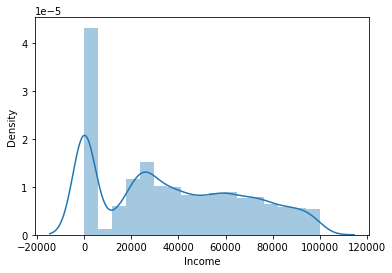

In [2499]:
iqr = np.percentile(data_num["Income"],75) - np.percentile(data_num["Income"],25)
upper_limit = np.percentile(data_num["Income"],75) + 1.5*iqr
lower_limit = np.percentile(data_num["Income"],25) - 1.5*iqr
data_num = data_num[(data_num["Income"]>lower_limit) & (data_num["Income"]<upper_limit)]
sns.distplot(data_num["Income"])
plt.show()

iqr = np.percentile(data_num["Monthly_Premium_Auto"],75) - np.percentile(data_num["Monthly_Premium_Auto"],25)
upper_limit = np.percentile(data_num["Monthly_Premium_Auto"],75) + 1.5*iqr
lower_limit = np.percentile(data_num["Monthly_Premium_Auto"],25) - 1.5*iqr
data_num = data_num[(data_num["Monthly_Premium_Auto"]>lower_limit) & (data_num["Monthly_Premium_Auto"]<upper_limit)]
sns.distplot(data_num["Monthly_Premium_Auto"])
plt.show()

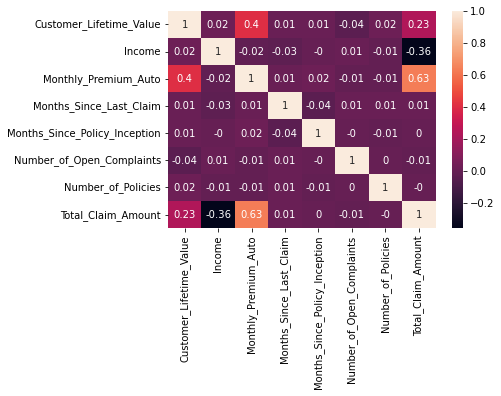

In [2500]:
correlation = round(data_num.corr(),2)
sns.heatmap(correlation, annot=True)
plt.show()
#There aren't any features with a very high correlation between themselves for us to drop.
#At the same time, features such as "Number_of_Policies" and 'Months_Since_Policy_Inception" have very little correlation with our label, 
#so we'll be dropping those variables. 

In [2501]:
data_num = data_num.drop(['Months_Since_Policy_Inception', 'Number_of_Policies', "Months_Since_Last_Claim", "Number_of_Open_Complaints"], axis=1)

In [2502]:
data_num

,Customer_Lifetime_Value,Monthly_Premium_Auto,Total_Claim_Amount
0,2763.519279,69,384.811147
1,6979.535903,94,1131.464935
2,12887.431650,108,566.472247
3,7645.861827,106,529.881344
4,2813.692575,73,138.130879
...,...,...,...
9129,23405.987980,73,198.234764
9130,3096.511217,79,379.200000
9131,8163.890428,85,790.784983
9132,7524.442436,96,691.200000


In [2503]:
#Normalization.

def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later

for column in data_num:
    data_num[column] = list(map(log_transfom_clean2, data_num[column]))
    data_num[column] = data_num[column].fillna(np.mean(data_num[column]))



In [2504]:
#Standard Scaling vs. MinMax Scaling
transformer = StandardScaler().fit(data_num)
data_standardized = transformer.transform(data_num)
print(data_standardized.shape)
pd.DataFrame(data_standardized, columns=data_num.columns)

(9134, 3)


,Customer_Lifetime_Value,Monthly_Premium_Auto,Total_Claim_Amount
0,-0.762878,-0.703925,-0.169640
1,-0.149245,0.022691,2.400737
2,0.710636,0.429596,0.455734
3,-0.052263,0.371467,0.329769
4,-0.755575,-0.587666,-1.018843
...,...,...,...
9129,2.241590,-0.587666,-0.811934
9130,-0.714411,-0.413278,-0.188956
9131,0.023135,-0.238891,1.227937
9132,-0.069935,0.080820,0.885113


transformer = MinMaxScaler().fit(data_num)
data_normalized = transformer.transform(data_num)
print(data_normalized.shape)
data_normalized = pd.DataFrame(data_normalized, columns=data_num.columns)
data_normalized

In [2505]:
#Encoding Categorical Data.
data_cat

,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [2506]:
data_cat =data_cat.drop(['Vehicle_Size','Policy_Type'], axis=1)

In [2507]:
encoder = OneHotEncoder(drop='first').fit(data_cat)
encoded = encoder.transform(data_cat).toarray()
cols = encoder.get_feature_names(input_features=data_cat.columns)
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2508]:
#Concatenating numerical and categorical data

In [2509]:
#X-y split
data2 = pd.concat([data_normalized, onehot_encoded], axis=1)

In [2510]:
data2

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Total_Claim_Amount,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,...,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car
0,0.010629,0.562847,0.033755,0.132974,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.062406,0.000000,0.139241,0.391051,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.134960,0.487763,0.198312,0.195764,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.070589,0.000000,0.189873,0.183117,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.011245,0.438443,0.050633,0.047710,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.068485,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,0.014719,0.216081,0.075949,0.131034,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,0.076951,0.000000,0.101266,0.273297,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,0.069098,0.219452,0.147679,0.238876,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2511]:
for column in data2:
    data2[column] = data2[column].fillna(np.mean(data2[column]))

In [2512]:
y = data2['Total_Claim_Amount']


In [2513]:
X = data2.drop(['Total_Claim_Amount'], axis=1)

In [2514]:
#Splitting into train set and test set.

In [2515]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

In [2516]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4567, 100)
(4567, 100)
(4567,)
(4567,)


In [2517]:
#Apply linear regression.
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [2518]:
#R2.
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

C:\Users\franc\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.7701333135023813

In [2519]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.7724139438077757

In [2520]:
#MSE
mse = mean_squared_error(y_test,predictions)
print(mse)

0.002292005042798684


In [2521]:
#RMSE
rmse = math.sqrt(mse)
print(rmse)

0.04787488948079864


In [2522]:
#MAE
mae = mean_absolute_error(y_test, predictions)
print(mae)

0.03319537215659144


In [2523]:
data3 = pd.concat([data2,pd.Series(predictions)],axis=1).head()

In [2524]:
data3

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Total_Claim_Amount,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,...,Renew_Offer_Type_Offer4,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,0
0,0.010629,0.562847,0.033755,0.132974,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.196639
1,0.062406,0.000000,0.139241,0.391051,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149417
2,0.134960,0.487763,0.198312,0.195764,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.217494
3,0.070589,0.000000,0.189873,0.183117,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.061545
4,0.011245,0.438443,0.050633,0.047710,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122880


### Present results.

1. Removing outliers have actually decreased prediction rates considerably (from a r2score of around 0,76 to around 0,4).
2. Removing features that have very little correlation (almost zero) to the label have pratically no impact on the model.
3. Different scaling methods have not significantly interfered with prediction rates either.
4. Increasing the test size has not necessarily helped increasing prediction rates.

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


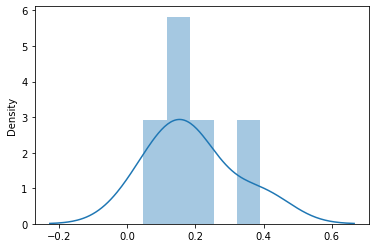

In [2525]:
sns.distplot(x=data3['Total_Claim_Amount'])
plt.show()

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


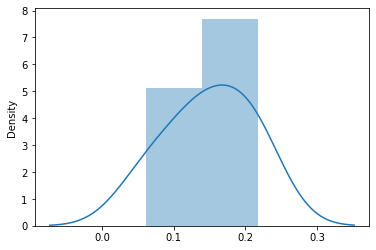

In [2526]:
sns.distplot(x=data3[0])
plt.show()